# Downloading & Saving the dataset

# Getting our Workspace Ready!

In [1]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 14.3MB/s 
     |████████████████████████████████| 952kB 24.9MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65175 sha256=94cf0f2f9113d0c84e86ae731a2d40c4b6b855eb6083482677120a504b6dbec3
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install cpython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html


!pip install --upgrade git+git://github.com/wandb/client.git

!pip install --upgrade matplotlib

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 21kB/s 
     |████████████████████████████████| 4.0MB 69.4MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.4.0+cu100 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
     |████████████████████████████████| 276kB 13.6MB/s 
  Created wheel for cpython: filename=cPython-0.0.6-cp37-none-any.whl size=4913 sha256=984e3aef2e95cc0f4fb64936871d5c993c93339a88abda4245428255bd28dd0f
  Stored in directory: /root/.cache/pip/wheels/96/a8/ca/1e4bbac2c17f655877b9abcb468bc67fb14ce349da01e48372
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44091 sha256=f73bb9a9e3

In [1]:
# Importing detectron2 & torch

import detectron2
import torch
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer, HookBase
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_test_loader
from detectron2.structures import BoxMode
from detectron2.utils.events import get_event_storage
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

# Importing some common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import  train_test_split
import wandb
from ast import literal_eval
import cv2
import os
import glob



In [2]:
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
!wandb login d6cc112cedb814d20dcaca0759e9f2140dc33f6a

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Reading our dataset


In [5]:
dataset = pd.read_csv("/content/drive/My Drive/augmented/data.csv")

In [6]:
dataset

,Unnamed: 0,image_id,bbox
0,0,1.png,"[461, 81, 4, 12]"
1,1,1.png,"[635, 78, 15, 5]"
2,2,1.png,"[635, 83, 16, 4]"
3,3,1.png,"[604, 136, 8, 12]"
4,4,1.png,"[600, 137, 7, 14]"
...,...,...,...
43970,43987,1514.png,"[720, 539, 11, 8]"
43971,43988,1514.png,"[589, 654, 8, 8]"
43972,43989,1514.png,"[431, 643, 18, 6]"
43973,43990,1514.png,"[444, 739, 12, 6]"


In [7]:
dataset.reset_index(drop=True, inplace=True)

In [8]:
dataset

,Unnamed: 0,image_id,bbox
0,0,1.png,"[461, 81, 4, 12]"
1,1,1.png,"[635, 78, 15, 5]"
2,2,1.png,"[635, 83, 16, 4]"
3,3,1.png,"[604, 136, 8, 12]"
4,4,1.png,"[600, 137, 7, 14]"
...,...,...,...
43970,43987,1514.png,"[720, 539, 11, 8]"
43971,43988,1514.png,"[589, 654, 8, 8]"
43972,43989,1514.png,"[431, 643, 18, 6]"
43973,43990,1514.png,"[444, 739, 12, 6]"


# Image Visualisations

In [9]:
def show_images(images_id):

  for image_id in images_id:

    img_path = '/content/drive/My Drive/dataset_inverted/'+image_id

    img = plt.imread(img_path)

    bboxs = [literal_eval(box) for box in dataset[dataset['image_id'] == image_id]['bbox']] 

    for bbox in bboxs:

      bbox = list(map(int, bbox))

      cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), (0, 255, 0), 2)

    plt.imshow(img)

    plt.show()

In [10]:
[dataset['image_id'].unique()[1000]]

['1006.png']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


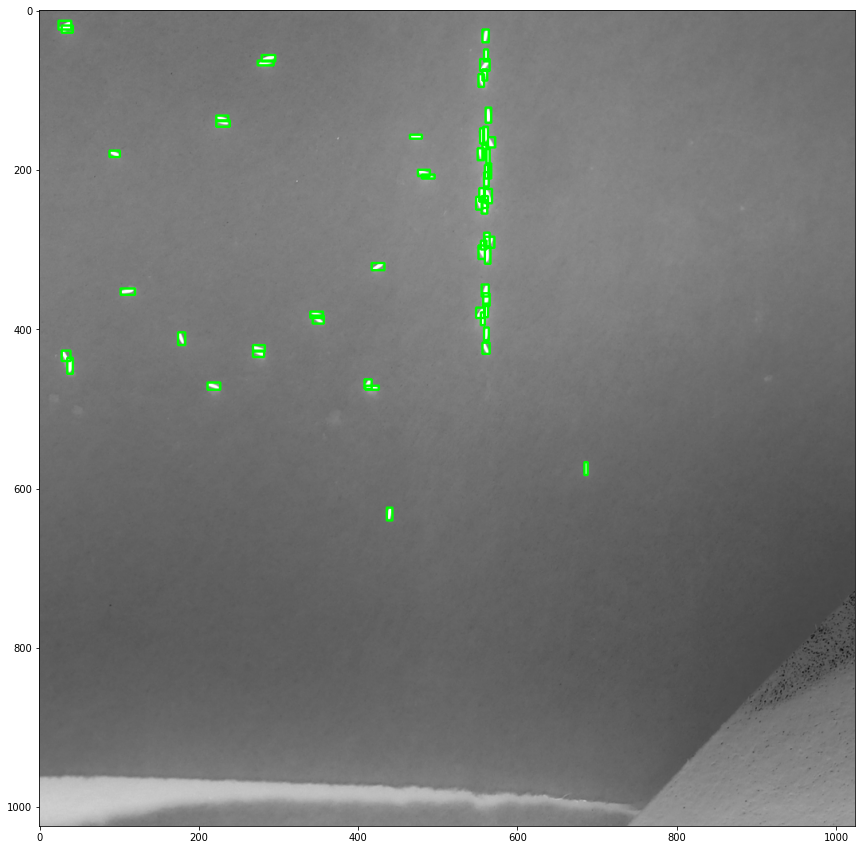

In [11]:

show_images([dataset['image_id'].unique()[1000]])


# Making Training & Validation Data

In [12]:
# Assigning each unique image_id with corresponding category_id

dataset['image_category_id'] = dataset.groupby("image_id").ngroup()
dataset

,Unnamed: 0,image_id,bbox,image_category_id
0,0,1.png,"[461, 81, 4, 12]",0
1,1,1.png,"[635, 78, 15, 5]",0
2,2,1.png,"[635, 83, 16, 4]",0
3,3,1.png,"[604, 136, 8, 12]",0
4,4,1.png,"[600, 137, 7, 14]",0
...,...,...,...,...
43970,43987,1514.png,"[720, 539, 11, 8]",572
43971,43988,1514.png,"[589, 654, 8, 8]",572
43972,43989,1514.png,"[431, 643, 18, 6]",572
43973,43990,1514.png,"[444, 739, 12, 6]",572


## Spliting our Dataset into Training & Validation

In [13]:

unique_imgs_id = dataset['image_id'].unique()
train_data = unique_imgs_id

train_imgs_id, val_imgs_id = train_test_split(unique_imgs_id, test_size=0.2, shuffle=False)

train_df = dataset[dataset['image_id'].isin(train_imgs_id)]
val_df = dataset[dataset['image_id'].isin(val_imgs_id)]

In [14]:
train_df, val_df

(       Unnamed: 0  image_id               bbox  image_category_id
 0               0     1.png   [461, 81, 4, 12]                  0
 1               1     1.png   [635, 78, 15, 5]                  0
 2               2     1.png   [635, 83, 16, 4]                  0
 3               3     1.png  [604, 136, 8, 12]                  0
 4               4     1.png  [600, 137, 7, 14]                  0
 ...           ...       ...                ...                ...
 35175       35192  1212.png  [720, 539, 11, 8]                238
 35176       35193  1212.png   [589, 654, 8, 8]                238
 35177       35194  1212.png  [431, 643, 18, 6]                238
 35178       35195  1212.png  [444, 739, 12, 6]                238
 35179       35196  1212.png  [580, 728, 11, 8]                238
 
 [35180 rows x 4 columns],
        Unnamed: 0  image_id               bbox  image_category_id
 35180       35197  1213.png   [461, 81, 4, 12]                239
 35181       35198  1213.png   [6

In [15]:
train_imgs_id.shape, val_imgs_id.shape

((1207,), (302,))

In [16]:
# Creating a function to take a dataframe and return the list of dictionaries which containes of all the information of our images in COCO data format
def get_dataset_dics(df):

  dataset_dics = []

  for img_id in df.groupby('image_id'):

    ann_list = []

    for bbox in img_id[1]['bbox']:

      bbox_list = literal_eval(bbox)

      ann_dict = {'bbox': bbox_list,
                 'bbox_mode': BoxMode.XYWH_ABS,
                 'category_id':0,
                 'iscrowd':0}

      ann_list.append(ann_dict)

  
    image_dict = {'annotations':ann_list,
                  'file_name':'/content/drive/My Drive/dataset_inverted/'+img_id[0],
                  'height':1024,
                  'width':1024,
                  'image_id':int(img_id[1]['image_category_id'].values[0])}
    

    dataset_dics.append(image_dict)

  return dataset_dics

In [17]:
train_dict = get_dataset_dics(train_df)
valid_dict = get_dataset_dics(val_df)

In [18]:
train_dict[1]

{'annotations': [{'bbox': [1021, 994, 3, 6],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [1016, 990, 7, 9],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [994, 1016, 6, 8],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [950, 989, 12, 7],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [943, 989, 7, 9],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [938, 999, 10, 9],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [931, 997, 5, 11],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [987, 973, 10, 8],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [993, 977, 13, 4],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>,
   'category_id': 0,
   'iscrowd': 0},
  {'bbox': [10

## Registering Our Training & Validation Set

In [19]:
TRAIN_DATASET_NAME = 'eggs_train_6'
VAL_DATASET_NAME = 'eggs_val_6'

DatasetCatalog.register(TRAIN_DATASET_NAME, lambda : get_dataset_dics(train_df))
MetadataCatalog.get(TRAIN_DATASET_NAME).set(thing_classes=['eggs'])

DatasetCatalog.register(VAL_DATASET_NAME, lambda : get_dataset_dics(val_df))
MetadataCatalog.get(VAL_DATASET_NAME).set(thing_classes=['eggs'])

Metadata(name='eggs_val_6', thing_classes=['eggs'])

In [20]:
train_metadata = MetadataCatalog.get(TRAIN_DATASET_NAME)
train_metadata

Metadata(name='eggs_train_6', thing_classes=['eggs'])

## Visulising Our Images

# Creating Our Model

In [21]:
cfg = get_cfg()

# Set Our Architecture & Weights

model_path = "COCO-Detection/faster_rcnn_R_50_DC5_1x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

# Putting Training & Validation Data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VAL_DATASET_NAME,)

# Setting Batch Size, number of classes, learning rate and threshold and much more..

cfg.SOLVER.BASE_LR = 0.005
cfg.SOLVER.MAX_ITER = 15104
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.MODEL.RETINANET.NUM_CLASSES = 1

cfg.OUTPUT_DIR = 'output/faster_rcnn'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

[06/21 06:46:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

## Making a CallBack

In [22]:
# 1. EPOCH = MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# 2. EPOCH * TOTAL_NUM_IMAGES = MAX_ITER 
# 3. ( EPOCH * TOTAL_NUM_IMAGES ) / BATCH_SIZE = MAX_ITER

# Training Model for 1 Epoch

In [23]:
cfg = get_cfg()

# Set Our Architecture & Weights

model_path = "COCO-Detection/faster_rcnn_R_50_DC5_1x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

# Putting Training & Validation Data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VAL_DATASET_NAME,)

# Setting Batch Size, number of classes, learning rate and threshold and much more..

cfg.SOLVER.BASE_LR = 0.005

# 1. EPOCH = MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# 2. EPOCH * TOTAL_NUM_IMAGES = MAX_ITER 
# 3. ( EPOCH * TOTAL_NUM_IMAGES ) / BATCH_SIZE = MAX_ITER
cfg.SOLVER.MAX_ITER = 15104

cfg.SOLVER.IMS_PER_BATCH = 8
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.MODEL.RETINANET.NUM_CLASSES = 1

cfg.OUTPUT_DIR = 'output/faster_rcnn'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

[06/21 06:46:10 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

## Making a CallBack

In [24]:
class WandbCallback(HookBase):

  def __init__(self, cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths):
    super().__init__

    # Setting up all of our parameters
    self.cfg = cfg
    self.VAL_DATASET_NAME = VAL_DATASET_NAME
    self.trainer = trainer
    self.train_metadata = train_metadata
    self.imgs_paths = imgs_paths

  # Function to run every iteration, for sending all metrics to weights & biases
  def after_step(self):

    storage = get_event_storage()

    values = storage.latest().items()

    wandb.log(dict(values))

    if self.trainer.iter % 50 == 0:

      self.trainer.model.eval()

      for img_path in imgs_paths:

        image = cv2.imread(img_path)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        with torch.no_grad():
          outputs = self.trainer.model([
                                        {"image":torch.from_numpy(image.transpose(2, 0, 1))}
          ]) 

        
        box_data = []

        for count, bbox in enumerate(outputs[0]['instances'].pred_boxes.tensor.cpu().numpy()):

          box_data.append({"position":{
              "minX":int(bbox[0]),
              "maxX":int(bbox[2]),
              "minY":int(bbox[1]),
              "maxY":int(bbox[3])
          },
          "class_id":0,
          "domain":"pixel",
          "box_caption":str(outputs[0]['instances'].scores.cpu().numpy()[count]),
          "scores":{"predictions":float(outputs[0]['instances'].scores.cpu().numpy()[count])}
          })

        boxes = {"predictions":{
            "box_data":box_data,
            "class_labels":{0:"eggs"}
        }}

        wandb.log({img_path.split('/')[-1]:wandb.Image(image, boxes=boxes)})


      self.trainer.model.train()

    
  # Called after the model training is completed, to evaluate our model using validation dataset
  def after_train(self):

    evaluator = COCOEvaluator(self.VAL_DATASET_NAME, self.cfg, False, output_dir=self.cfg.OUTPUT_DIR)

    val_loader = build_detection_test_loader(self.cfg, self.VAL_DATASET_NAME,)

    valResults = inference_on_dataset(self.trainer.model, val_loader, evaluator)

    wandb.log(dict(valResults['bbox']))


## Setting up Callbacks

In [25]:
imgs_paths = glob.glob("/content/drive/My Drive/dataset_inverted/'*.png")[:5]
imgs_paths

wandb_callback = WandbCallback(cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths)

trainer.register_hooks([wandb_callback])

trainer.resume_or_load(resume=False)

model_final_51d356.pkl: 663MB [00:54, 12.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_pre

## Setting up Wandb

In [26]:
wandb.init(project='egg_detection1', config=cfg.copy(), name='faster-rcnn one epoch train', notes='Training Faster-RCNN Model for 1 epoch')

wandb: Currently logged in as: zeynepozel (use `wandb login --relogin` to force relogin)


## Training Our Model

In [27]:
trainer.train()

[06/21 06:47:18 d2.engine.train_loop]: Starting training from iteration 0


Exception ignored in: <finalize object at 0x7f46cea22c40; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 936, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpnox0c2_b'


[06/21 06:48:11 d2.utils.events]:  eta: 11:03:24  iter: 19  total_loss: 1.385  loss_cls: 0.646  loss_box_reg: 0.070  loss_rpn_cls: 0.423  loss_rpn_loc: 0.192  time: 2.6113  data_time: 0.0996  lr: 0.000100  max_mem: 9044M
[06/21 06:49:02 d2.utils.events]:  eta: 10:56:50  iter: 39  total_loss: 0.636  loss_cls: 0.250  loss_box_reg: 0.206  loss_rpn_cls: 0.041  loss_rpn_loc: 0.121  time: 2.5966  data_time: 0.0175  lr: 0.000200  max_mem: 9044M
[06/21 06:49:53 d2.utils.events]:  eta: 10:52:07  iter: 59  total_loss: 0.498  loss_cls: 0.158  loss_box_reg: 0.213  loss_rpn_cls: 0.034  loss_rpn_loc: 0.096  time: 2.5743  data_time: 0.0173  lr: 0.000300  max_mem: 9044M
[06/21 06:50:44 d2.utils.events]:  eta: 10:49:35  iter: 79  total_loss: 0.547  loss_cls: 0.143  loss_box_reg: 0.256  loss_rpn_cls: 0.027  loss_rpn_loc: 0.117  time: 2.5679  data_time: 0.0173  lr: 0.000400  max_mem: 9044M
[06/21 06:51:35 d2.utils.events]:  eta: 10:47:53  iter: 99  total_loss: 0.459  loss_cls: 0.112  loss_box_reg: 0.227 

wandb: 500 encountered ({"error":"Error 1040: Too many connections"}), retrying request
wandb: Network error resolved after 0:00:37.480668, resuming normal operation.


[06/21 11:17:51 d2.utils.events]:  eta: 6:17:35  iter: 6379  total_loss: 0.337  loss_cls: 0.043  loss_box_reg: 0.221  loss_rpn_cls: 0.007  loss_rpn_loc: 0.055  time: 2.5420  data_time: 0.0223  lr: 0.005000  max_mem: 9044M
[06/21 11:18:42 d2.utils.events]:  eta: 6:16:44  iter: 6399  total_loss: 0.350  loss_cls: 0.050  loss_box_reg: 0.235  loss_rpn_cls: 0.008  loss_rpn_loc: 0.067  time: 2.5421  data_time: 0.0230  lr: 0.005000  max_mem: 9044M
[06/21 11:19:34 d2.utils.events]:  eta: 6:16:00  iter: 6419  total_loss: 0.327  loss_cls: 0.041  loss_box_reg: 0.232  loss_rpn_cls: 0.007  loss_rpn_loc: 0.057  time: 2.5422  data_time: 0.0239  lr: 0.005000  max_mem: 9044M


wandb: 500 encountered ({"error":"Error 1040: Too many connections"}), retrying request
wandb: Network error resolved after 0:02:18.419300, resuming normal operation.


[06/21 11:20:25 d2.utils.events]:  eta: 6:15:09  iter: 6439  total_loss: 0.369  loss_cls: 0.048  loss_box_reg: 0.246  loss_rpn_cls: 0.010  loss_rpn_loc: 0.065  time: 2.5423  data_time: 0.0260  lr: 0.005000  max_mem: 9044M
[06/21 11:21:16 d2.utils.events]:  eta: 6:14:22  iter: 6459  total_loss: 0.328  loss_cls: 0.044  loss_box_reg: 0.219  loss_rpn_cls: 0.007  loss_rpn_loc: 0.055  time: 2.5423  data_time: 0.0258  lr: 0.005000  max_mem: 9044M
[06/21 11:22:08 d2.utils.events]:  eta: 6:13:32  iter: 6479  total_loss: 0.300  loss_cls: 0.042  loss_box_reg: 0.199  loss_rpn_cls: 0.005  loss_rpn_loc: 0.058  time: 2.5425  data_time: 0.0274  lr: 0.005000  max_mem: 9044M
[06/21 11:22:59 d2.utils.events]:  eta: 6:12:42  iter: 6499  total_loss: 0.334  loss_cls: 0.046  loss_box_reg: 0.232  loss_rpn_cls: 0.007  loss_rpn_loc: 0.062  time: 2.5425  data_time: 0.0279  lr: 0.005000  max_mem: 9044M
[06/21 11:23:50 d2.utils.events]:  eta: 6:11:55  iter: 6519  total_loss: 0.352  loss_cls: 0.051  loss_box_reg: 0

wandb: Network error resolved after 0:03:41.369375, resuming normal operation.


[06/21 12:09:03 d2.utils.events]:  eta: 5:26:27  iter: 7579  total_loss: 0.341  loss_cls: 0.040  loss_box_reg: 0.225  loss_rpn_cls: 0.007  loss_rpn_loc: 0.056  time: 2.5448  data_time: 0.0260  lr: 0.005000  max_mem: 9044M
[06/21 12:09:55 d2.utils.events]:  eta: 5:25:39  iter: 7599  total_loss: 0.309  loss_cls: 0.042  loss_box_reg: 0.193  loss_rpn_cls: 0.007  loss_rpn_loc: 0.057  time: 2.5449  data_time: 0.0260  lr: 0.005000  max_mem: 9044M
[06/21 12:10:46 d2.utils.events]:  eta: 5:24:44  iter: 7619  total_loss: 0.333  loss_cls: 0.047  loss_box_reg: 0.216  loss_rpn_cls: 0.008  loss_rpn_loc: 0.062  time: 2.5449  data_time: 0.0259  lr: 0.005000  max_mem: 9044M
[06/21 12:11:38 d2.utils.events]:  eta: 5:23:48  iter: 7639  total_loss: 0.368  loss_cls: 0.046  loss_box_reg: 0.241  loss_rpn_cls: 0.008  loss_rpn_loc: 0.063  time: 2.5450  data_time: 0.0243  lr: 0.005000  max_mem: 9044M
[06/21 12:12:28 d2.utils.events]:  eta: 5:22:53  iter: 7659  total_loss: 0.318  loss_cls: 0.041  loss_box_reg: 0

# Loading Our Model & Making Predictions Faster-rcnn

In [62]:
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + '/model_final.pth'

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8



predictor = DefaultPredictor(cfg)

In [63]:
image = cv2.imread("/content/drive/My Drive/dataset_inverted/97.png")

outputs = predictor(image)

In [64]:
outputs

{'instances': Instances(num_instances=97, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[8.8495e+02, 2.4001e+02, 8.9549e+02, 2.5273e+02],
         [1.1073e+02, 1.6234e+02, 1.2046e+02, 1.7666e+02],
         [9.1775e+01, 2.1176e+02, 1.0137e+02, 2.2469e+02],
         [1.8177e+02, 3.6859e+02, 1.9752e+02, 3.7748e+02],
         [5.0914e+02, 6.9006e+01, 5.2060e+02, 8.4020e+01],
         [4.6285e+02, 4.7473e+02, 4.7877e+02, 4.8323e+02],
         [8.1041e+02, 1.7904e+02, 8.2554e+02, 1.8935e+02],
         [5.3498e+02, 5.0709e+02, 5.5157e+02, 5.1347e+02],
         [3.9147e+02, 2.3349e+02, 4.0674e+02, 2.3920e+02],
         [4.3048e+02, 3.8049e+02, 4.3755e+02, 3.9435e+02],
         [6.4843e+02, 4.0228e+02, 6.6446e+02, 4.0820e+02],
         [1.7912e+02, 1.2819e+02, 1.9339e+02, 1.4128e+02],
         [6.3288e+02, 3.7786e+02, 6.3846e+02, 3.9231e+02],
         [3.4012e+02, 3.6543e+02, 3.4552e+02, 3.8178e+02],
         [6.4805e+01, 3.2915e+02, 7.0269e+01, 3.4449e+02],
         [5

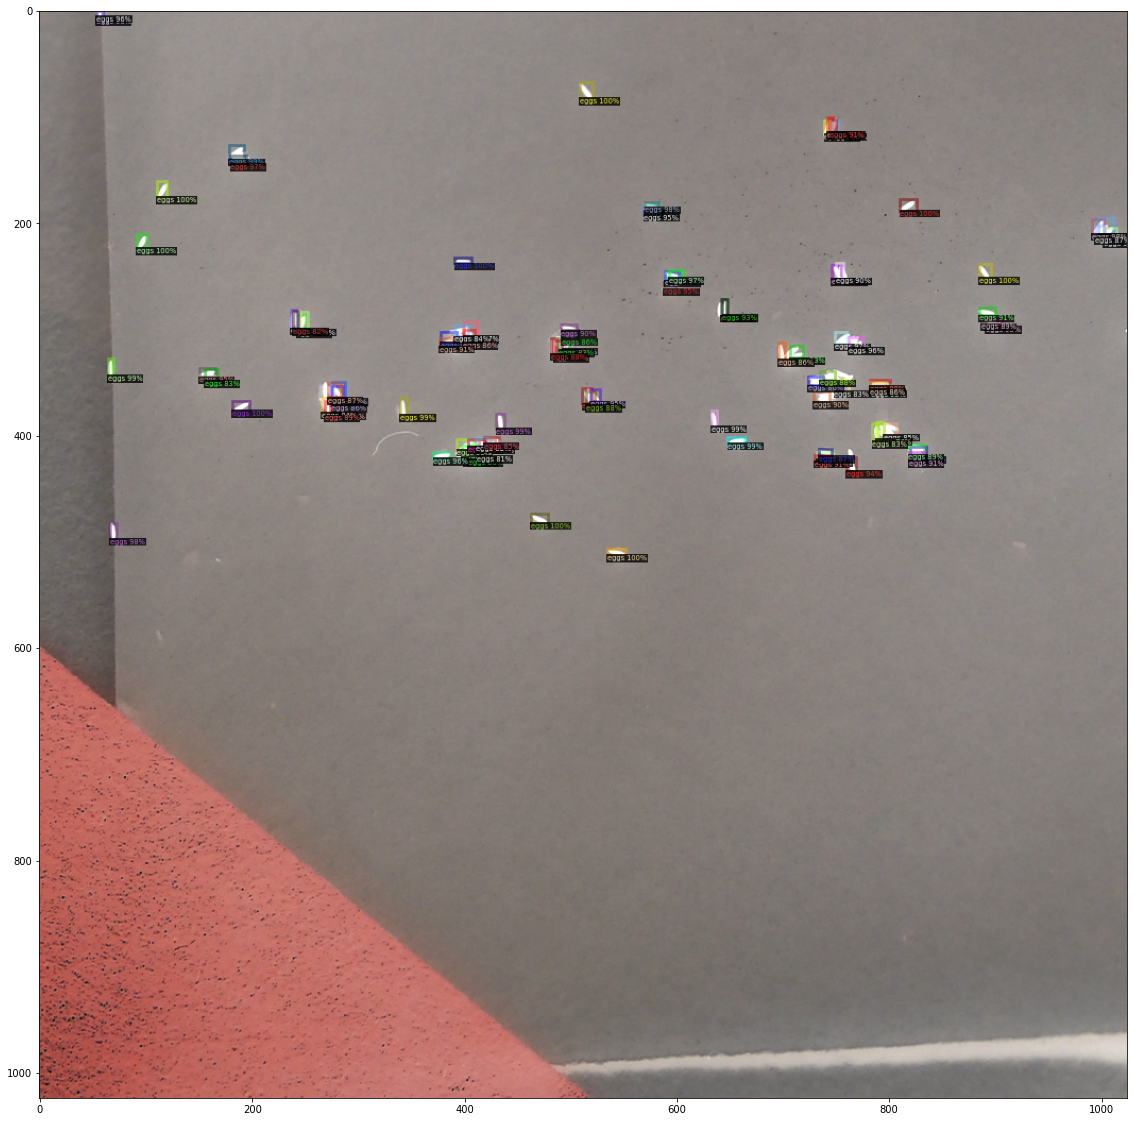

In [65]:
visualizer = Visualizer(image, 
                        metadata=train_metadata,
                        scale=1.0)

visualizer = visualizer.draw_instance_predictions(outputs['instances'].to("cpu"))

plt.figure(figsize=(20, 20))
plt.imshow(visualizer.get_image())

# Retinanet Training

In [ ]:
cfg = get_cfg()

# Set Our Architecture & Weights

model_path = "COCO-Detection/retinanet_R_50_FPN_1x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)

# Putting Training & Validation Data
cfg.DATASETS.TRAIN = (TRAIN_DATASET_NAME,)
cfg.DATASETS.TEST = (VAL_DATASET_NAME,)

# Setting Batch Size, number of classes, learning rate and threshold and much more..

cfg.SOLVER.BASE_LR = 0.002

# 1. EPOCH = MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# 2. EPOCH * TOTAL_NUM_IMAGES = MAX_ITER 
# 3. ( EPOCH * TOTAL_NUM_IMAGES ) / BATCH_SIZE = MAX_ITER
cfg.SOLVER.MAX_ITER = 400

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.MODEL.RETINANET.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.OUTPUT_DIR = 'output/retinanet'

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)

## Making a CallBack

In [ ]:
class WandbCallback(HookBase):

  def __init__(self, cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths):
    super().__init__

    # Setting up all of our parameters
    self.cfg = cfg
    self.VAL_DATASET_NAME = VAL_DATASET_NAME
    self.trainer = trainer
    self.train_metadata = train_metadata
    self.imgs_paths = imgs_paths

  # Function to run every iteration, for sending all metrics to weights & biases
  def after_step(self):

    storage = get_event_storage()

    values = storage.latest().items()

    wandb.log(dict(values))

    if self.trainer.iter % 50 == 0:

      self.trainer.model.eval()

      for img_path in imgs_paths:

        image = cv2.imread(img_path)

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        with torch.no_grad():
          outputs = self.trainer.model([
                                        {"image":torch.from_numpy(image.transpose(2, 0, 1))}
          ]) 

        
        box_data = []

        for count, bbox in enumerate(outputs[0]['instances'].pred_boxes.tensor.cpu().numpy()):

          box_data.append({"position":{
              "minX":int(bbox[0]),
              "maxX":int(bbox[2]),
              "minY":int(bbox[1]),
              "maxY":int(bbox[3])
          },
          "class_id":0,
          "domain":"pixel",
          "box_caption":str(outputs[0]['instances'].scores.cpu().numpy()[count]),
          "scores":{"predictions":float(outputs[0]['instances'].scores.cpu().numpy()[count])}
          })

        boxes = {"predictions":{
            "box_data":box_data,
            "class_labels":{0:"eggs"}
        }}

        wandb.log({img_path.split('/')[-1]:wandb.Image(image, boxes=boxes)})


      self.trainer.model.train()

    
  # Called after the model training is completed, to evaluate our model using validation dataset
  def after_train(self):

    evaluator = COCOEvaluator(self.VAL_DATASET_NAME, self.cfg, False, output_dir=self.cfg.OUTPUT_DIR)

    val_loader = build_detection_test_loader(self.cfg, self.VAL_DATASET_NAME,)

    valResults = inference_on_dataset(self.trainer.model, val_loader, evaluator)

    wandb.log(dict(valResults['bbox']))


## Setting up Callbacks

In [ ]:
imgs_paths = glob.glob("/content/drive/My Drive/dataset_inverted/*.png")[:5]
imgs_paths

wandb_callback = WandbCallback(cfg, VAL_DATASET_NAME, trainer, train_metadata, imgs_paths)

trainer.register_hooks([wandb_callback])

trainer.resume_or_load(resume=False)

## Setting up Wandb

In [ ]:
wandb.init(project='egg detection', config=cfg.copy(), name='retinanet', notes='Training Our first retiannet model')

## Training Our Model

In [ ]:
trainer.train()

# Loading Our Model & Making Predictions Retinanet

In [ ]:
cfg.MODEL.WEIGHTS = cfg.OUTPUT_DIR + '/model_final.pth'

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.7

predictor = DefaultPredictor(cfg)

In [ ]:
image = cv2.imread("/content/drive/My Drive/dataset_inverted/97.png")

outputs = predictor(image)

In [ ]:
outputs

In [ ]:
visualizer = Visualizer(image, 
                        metadata=train_metadata,
                        scale=1.0)

visualizer = visualizer.draw_instance_predictions(outputs['instances'].to("cpu"))

plt.figure(figsize=(15, 15))
plt.imshow(visualizer.get_image())